Mean Squared Error: 0.5558915986952441
R² Score: 0.575787706032451

Model Coefficients:
      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708

Intercept: -37.023277706064114


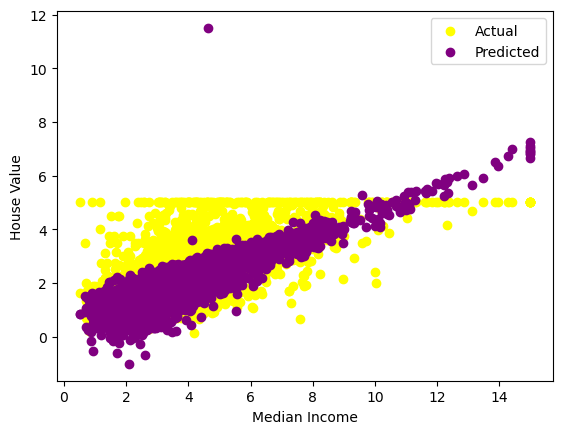

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\nModel Coefficients:")
print(coeff_df)
print("\nIntercept:", model.intercept_)

plt.scatter(X_test["MedInc"], y_test, label="Actual",color = "yellow")
plt.scatter(X_test["MedInc"], y_pred, color="purple", label="Predicted")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.legend()
plt.show()